# TASK1  - Prediction using superwised Machine Learning

To predict the percentage of marks of the students based on the numer of hours they studied


# Author: Sandhika

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Reading the Data source

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Check if there any null value in dataset

In [3]:
data.isnull==True

False

**There is no null value in dataset**

# Data Visualization

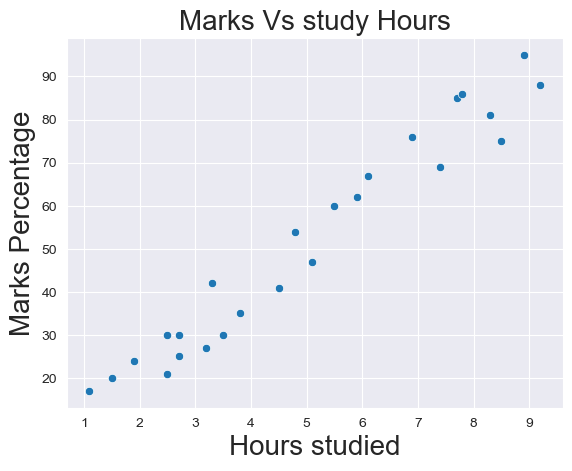

In [7]:
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'],x=data['Hours'])
plt.title("Marks Vs study Hours",size=20)
plt.ylabel("Marks Percentage",size=20)
plt.xlabel("Hours studied",size=20)
plt.show()

**From the above Scatterplot there looks to be correlation between 'marks percentage' and ' hours studied'.**

# Plotting the line of Regression

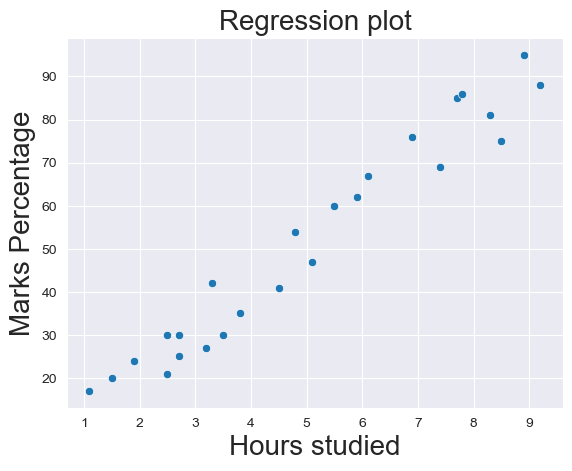

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:
sns.scatterplot(y=data['Scores'],x=data['Hours'])
plt.title("Regression plot",size=20)
plt.ylabel("Marks Percentage",size=20)
plt.xlabel("Hours studied",size=20)
plt.show()
print(data.corr())

**It shows the variables are positively correlated**

# Training the model

# 1. Splitting the data

**Defining X and Y from Data**

In [10]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

**Splitting data into two**

In [11]:
train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=0)

# 2.Fitting Data into Model

In [14]:
regression=LinearRegression()
regression.fit(train_X,train_y)
print("Model Trained successfully")

Model Trained successfully


# Predicting Percentage of Marks

In [16]:
pred_y=regression.predict(val_X)
prediction=pd.DataFrame({'Hours':[i[0] for i in val_X],'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the predicted Marks with Actual Marks

In [19]:
compare_Scores=pd.DataFrame({'Actual Marks':val_y,'Predicted Marks':pred_y})
compare_Scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Estimating training and test score

In [22]:

print("Training Score:",regression.score(train_X,train_y))
print("Test Score:",regression.score(val_X,val_y))

Training Score: 0.9484509249326872
Test Score: 0.9367661043365055


# Plotting the Bar graph to depict the difference between the actual and predicted value

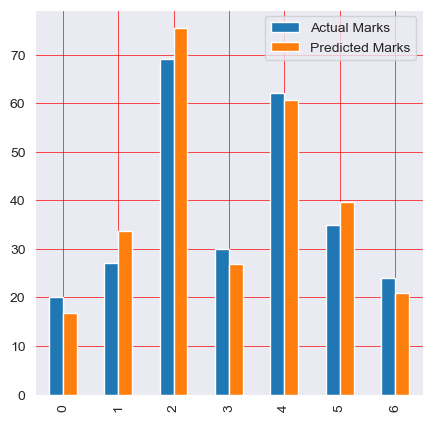

In [24]:
compare_Scores.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

# Evaluting the Model

**Calculating the accuracy of the model**

In [25]:
print('Mean Absolute Error:',mean_absolute_error(val_y,pred_y))

Mean Absolute Error: 4.130879918502486


**Small value of mean absolute error states that the chances of error or wrong forecasting through the model are very less**

# What will be predicted score if a student studies for 9.25 hrs/day?

In [29]:
hours=[9.25]
answer=regression.predict([hours])
print("No of Hours = {}".format(hours))
print("Scores={}".format(round(answer[0],3)))

No of Hours = [9.25]
Scores=93.893


# Conclusion

**If a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**